Colab files used for reference:

https://colab.research.google.com/drive/1ChDhvV-q_5ao8TFdUTYUA3e5cr8FgrTy#scrollTo=2YBNLmnpo-Bd
https://colab.research.google.com/drive/1aq21zdPzg-bWOJwlawas8xo_N68LfyWw?usp=sharing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [97]:
# Build a ML model to classify fraudulent (1) and non-fraudulent (0) insurance claims using the provided dataset.

df=pd.read_csv('/content/insurance_claims.csv')

In [98]:
df.shape

(10000, 26)

In [99]:
df.head()

,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,...,ClaimInvolvedCovers,DamageImportance,ConnectionBetweenParties,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
0,PH006844,V89073,Lawyer,2/16/14,Motorcycle,75165,0,2,76,31,...,Liability,5,No,81328,0.652447,0,37246.774861,17,0,0
1,PH004230,V64262,Teacher,9/14/11,Car,45809,1,1,97,67,...,Collision,8,No,88724,0.676261,0,32925.571674,19,1,0
2,PH004845,V91142,Business,10/11/15,Truck,42165,0,1,176,76,...,Comprehensive,1,No,68441,0.851770,0,5817.983955,22,0,0
3,PH004688,V37222,Engineer,4/12/16,Car,82232,0,1,151,71,...,Liability,9,No,44767,0.926641,0,48698.053140,22,0,0
4,PH006863,V57210,Business,6/27/12,SUV,85642,0,1,81,28,...,Liability,8,No,46852,0.353562,0,38666.693932,4,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderNumber                10000 non-null  object 
 1   FirstPartyVehicleNumber           10000 non-null  object 
 2   PolicyholderOccupation            10000 non-null  object 
 3   FirstPolicySubscriptionDate       10000 non-null  object 
 4   FirstPartyVehicleType             10000 non-null  object 
 5   PolicyholderPostCode              10000 non-null  int64  
 6   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 7   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 8   FpVehicleAgeMonths                10000 non-null  int64  
 9   PolicyHolderAge                   10000 non-null  int64  
 10  FirstPartyLiability               10000 non-null  float64
 11  ReferenceId                       10000 non-null  object 
 12  Third

In [101]:
convert_postcode_to_str = ['LossPostCode', 'PolicyholderPostCode']
df[convert_postcode_to_str] = df[convert_postcode_to_str].astype(str)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderNumber                10000 non-null  object 
 1   FirstPartyVehicleNumber           10000 non-null  object 
 2   PolicyholderOccupation            10000 non-null  object 
 3   FirstPolicySubscriptionDate       10000 non-null  object 
 4   FirstPartyVehicleType             10000 non-null  object 
 5   PolicyholderPostCode              10000 non-null  object 
 6   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 7   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 8   FpVehicleAgeMonths                10000 non-null  int64  
 9   PolicyHolderAge                   10000 non-null  int64  
 10  FirstPartyLiability               10000 non-null  float64
 11  ReferenceId                       10000 non-null  object 
 12  Third

In [103]:
df.describe()

,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,FirstPartyLiability,DamageImportance,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.29040,1.596800,120.534600,48.520900,0.499122,4.942900,0.497711,0.149500,25208.259731,11.529500,0.399600,0.010000
std,0.45397,0.857265,69.264548,17.764237,0.229996,2.595518,0.289893,0.356598,14251.494093,6.907699,0.809929,0.099504
min,0.00000,1.000000,1.000000,18.000000,0.100037,1.000000,0.000243,0.000000,509.943433,0.000000,0.000000,0.000000
25%,0.00000,1.000000,60.000000,33.000000,0.302596,3.000000,0.246545,0.000000,12899.706361,6.000000,0.000000,0.000000
50%,0.00000,1.000000,120.000000,49.000000,0.498444,5.000000,0.494026,0.000000,25112.443701,12.000000,0.000000,0.000000
75%,1.00000,2.000000,181.000000,64.000000,0.699865,7.000000,0.747446,0.000000,37717.133789,18.000000,1.000000,0.000000
max,1.00000,4.000000,239.000000,79.000000,0.899952,9.000000,0.999917,1.000000,49994.340280,23.000000,4.000000,1.000000


In [104]:
df.isnull().sum()

# shows no missing values

,0
PolicyholderNumber,0
FirstPartyVehicleNumber,0
PolicyholderOccupation,0
FirstPolicySubscriptionDate,0
FirstPartyVehicleType,0
PolicyholderPostCode,0
PolicyWasSubscribedOnInternet,0
NumberOfPoliciesOfPolicyholder,0
FpVehicleAgeMonths,0
PolicyHolderAge,0


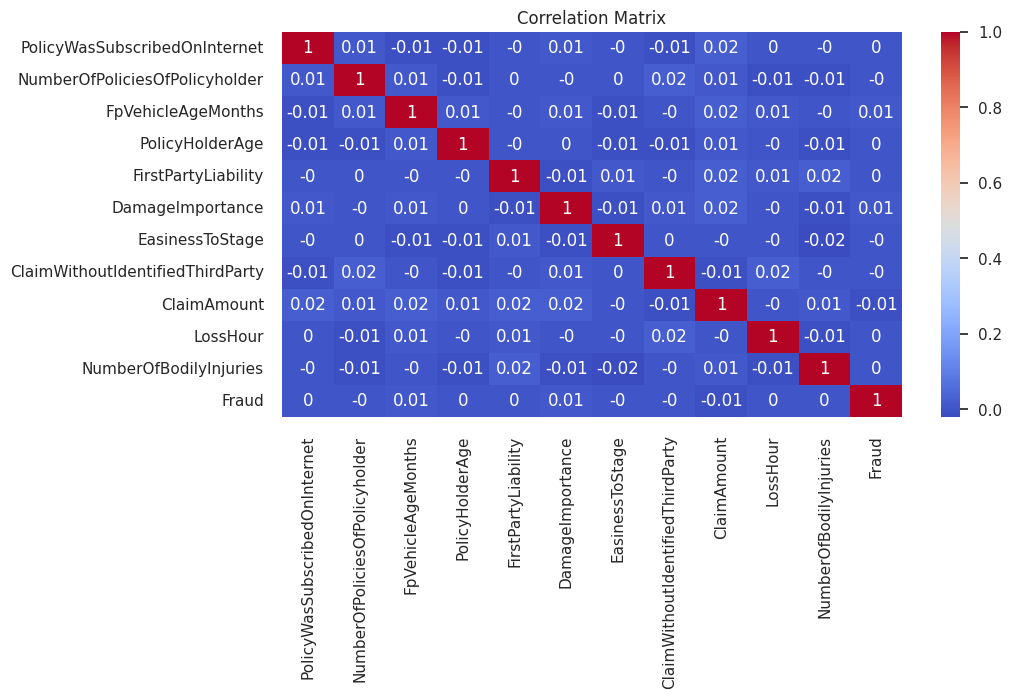

In [105]:
numerical_data = df.select_dtypes(include=[np.number])

correlation = numerical_data.corr().round(2)

plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

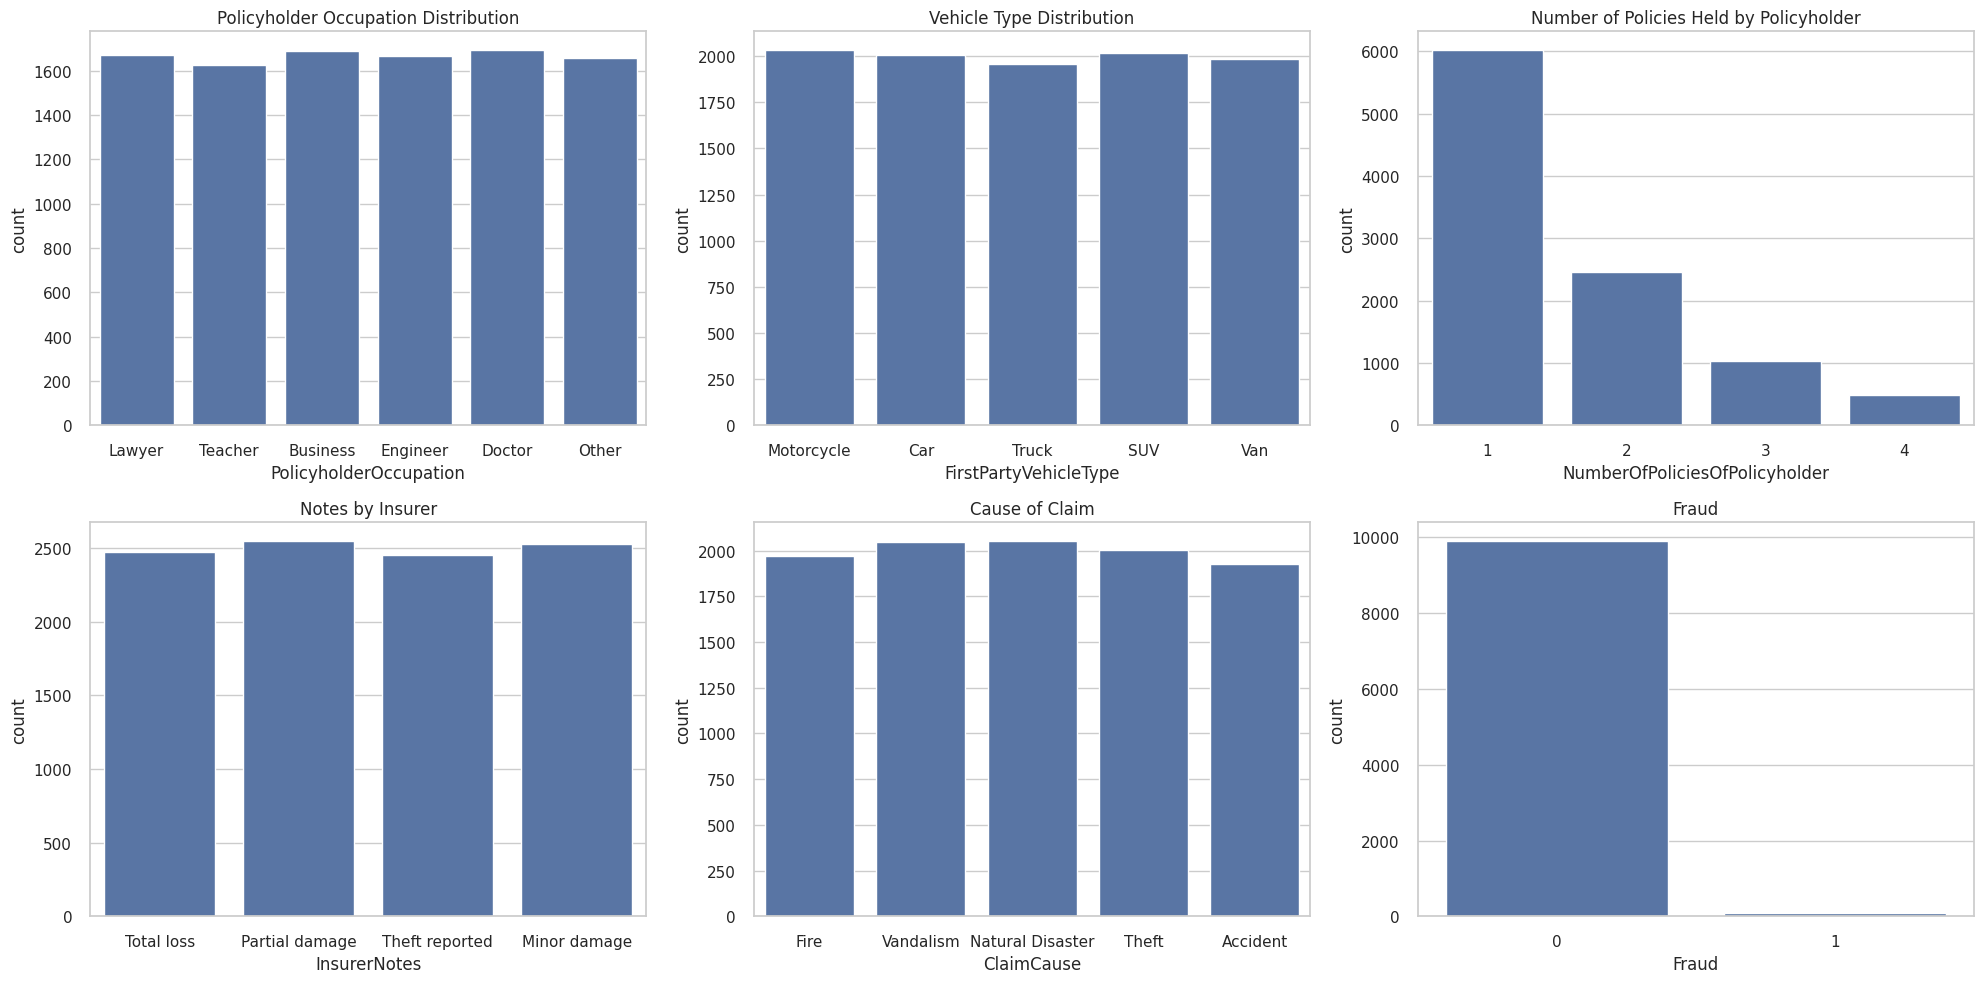

In [106]:
plt.figure(figsize=(20, 10))

# Policyholder Occupation
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='PolicyholderOccupation')
plt.title('Policyholder Occupation Distribution')

# Vehicle Type
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='FirstPartyVehicleType')
plt.title('Vehicle Type Distribution')

# Number of Policies Held by Policyholder
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='NumberOfPoliciesOfPolicyholder')
plt.title('Number of Policies Held by Policyholder')

# Notes by Insurer
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='InsurerNotes')
plt.title('Notes by Insurer')

# Cause of Claim
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='ClaimCause')
plt.title('Cause of Claim')

# Fraud (Target)
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Fraud')
plt.title('Fraud')

plt.tight_layout()
plt.show()

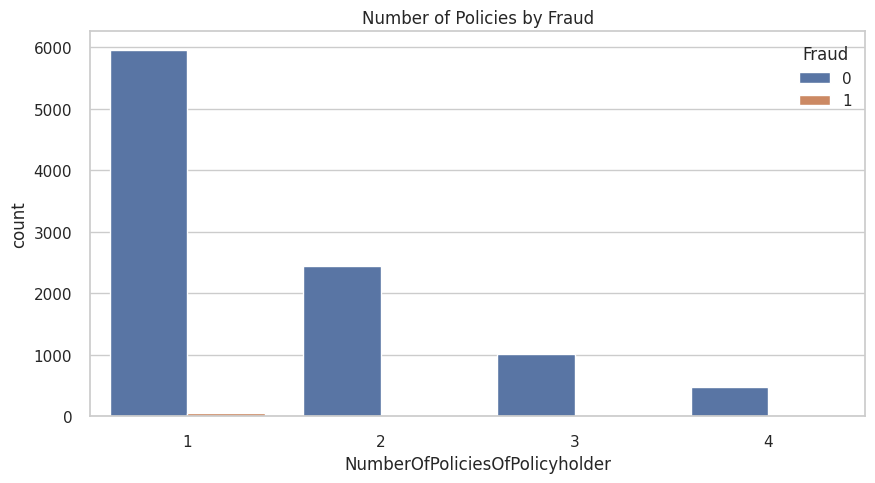

In [107]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NumberOfPoliciesOfPolicyholder', hue='Fraud')
plt.title('Number of Policies by Fraud')
plt.show()

# shows an individual with more number of policies is less likely to commit fraud

In [108]:
df = df.drop(['PolicyholderNumber', 'FirstPartyVehicleNumber', 'FirstPolicySubscriptionDate', 'ReferenceId', 'ThirdPartyVehicleNumber', 'PolicyholderPostCode', 'LossPostCode', 'LossDate'], axis = 1)

In [109]:
categorical_features = df.select_dtypes(include='object').columns.tolist() # code partially generated by generative AI
print("Categorical Columns:", categorical_features)

Categorical Columns: ['PolicyholderOccupation', 'FirstPartyVehicleType', 'InsurerNotes', 'ClaimCause', 'ClaimInvolvedCovers', 'ConnectionBetweenParties']


In [110]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

for col in df_encoded.select_dtypes(include='bool').columns: # this for statement is generated by generative AI
    df_encoded[col] = df_encoded[col].astype(int)

print(df_encoded.head())

   PolicyWasSubscribedOnInternet  NumberOfPoliciesOfPolicyholder  \
0                              0                               2   
1                              1                               1   
2                              0                               1   
3                              0                               1   
4                              0                               1   

   FpVehicleAgeMonths  PolicyHolderAge  FirstPartyLiability  DamageImportance  \
0                  76               31             0.121587                 5   
1                  97               67             0.612870                 8   
2                 176               76             0.871980                 1   
3                 151               71             0.500794                 9   
4                  81               28             0.771998                 8   

   EasinessToStage  ClaimWithoutIdentifiedThirdParty   ClaimAmount  LossHour  \
0         0.652447      

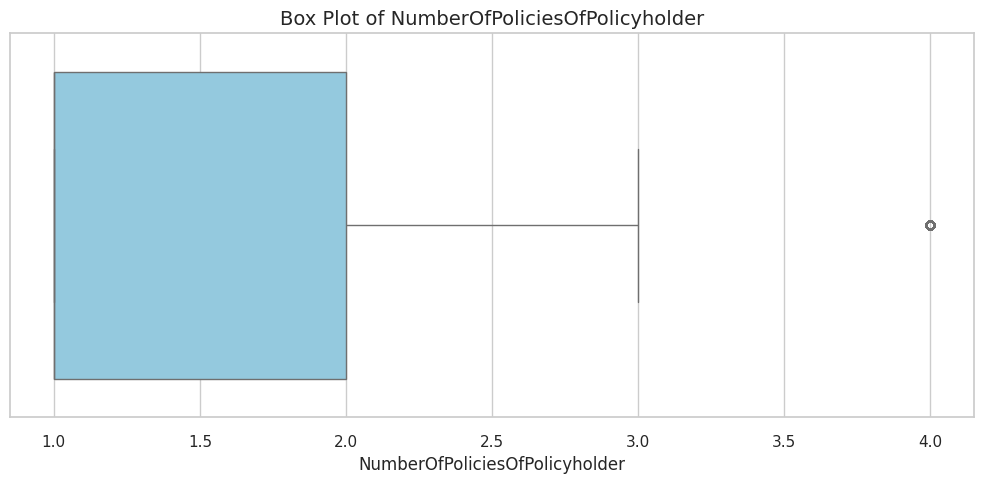

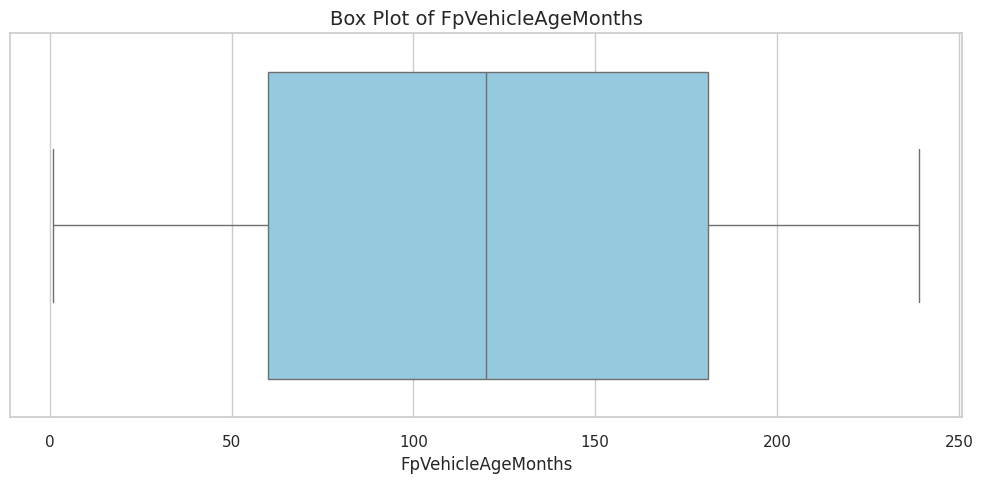

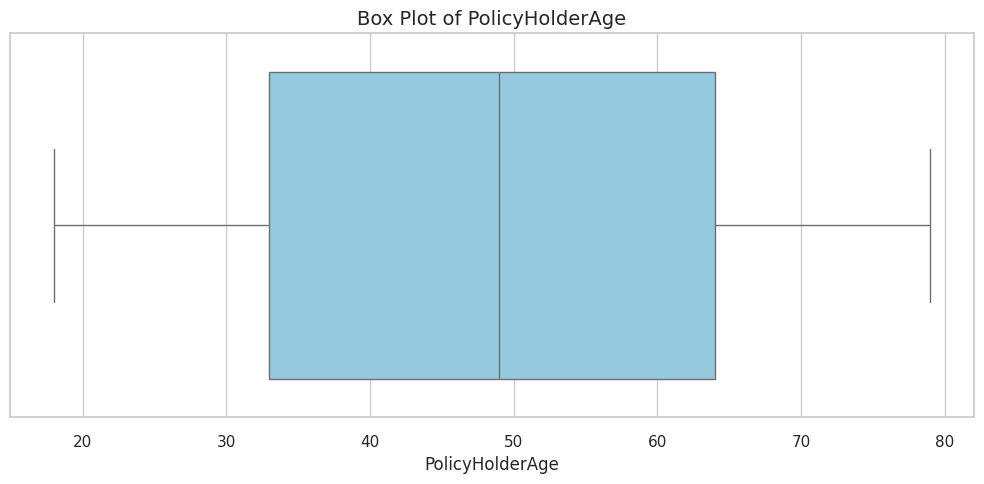

In [111]:
sns.set_palette("deep")
sns.set(style="whitegrid")

col = ['NumberOfPoliciesOfPolicyholder',  'FpVehicleAgeMonths', 'PolicyHolderAge']

for a in col:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[a], color="skyblue")
    plt.title(f'Box Plot of {a}', fontsize=14)
    plt.xlabel(a, fontsize=12)
    plt.tight_layout()
    plt.show()

In [112]:
X = df.drop('Fraud', axis = 1)
# X = X.values
y = df['Fraud']

In [113]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 17)
(7000,)
(3000, 17)
(3000,)


In [115]:
# The code in this cell was generated using generative AI

# Perform one-hot encoding on categorical features in X_train and X_test
categorical_features = X_train.select_dtypes(include=['object']).columns

X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Ensure both datasets have the same columns after one-hot encoding
missing_cols_train = set(X_test.columns) - set(X_train.columns)
missing_cols_test = set(X_train.columns) - set(X_test.columns)

for col in missing_cols_train:
    X_train[col] = 0  # Add missing columns to X_train and fill with 0
for col in missing_cols_test:
    X_test[col] = 0  # Add missing columns to X_test and fill with 0

# Reorder columns to match between training and test sets
X_train = X_train[X_test.columns]

In [116]:
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_features)

['PolicyWasSubscribedOnInternet', 'NumberOfPoliciesOfPolicyholder', 'FpVehicleAgeMonths', 'PolicyHolderAge', 'FirstPartyLiability', 'DamageImportance', 'EasinessToStage', 'ClaimWithoutIdentifiedThirdParty', 'ClaimAmount', 'LossHour', 'NumberOfBodilyInjuries']


In [121]:
import numpy as np

# Replace NaNs with the column-wise mean
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_train))  # Use training mean


In [122]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [123]:
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [124]:
# Logistic regression model with class-weight and L2 regularization

log_reg = LogisticRegression(class_weight='balanced', penalty='l2', C=0.1)

# Train the model on training data
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)

print(y_pred)
print(y_pred.shape)

[0 1 0 ... 0 1 0]
(3000,)


In [126]:
#probablities
probablities = log_reg.predict_proba(X_test)

for i in range(len(y_test)):
    print(probablities[i], '-->', y_pred[i])

[0.57361896 0.42638104] --> 0
[0.45782727 0.54217273] --> 1
[0.50650686 0.49349314] --> 0
[0.53478199 0.46521801] --> 0
[0.4443874 0.5556126] --> 1
[0.51201489 0.48798511] --> 0
[0.52735018 0.47264982] --> 0
[0.58533502 0.41466498] --> 0
[0.517252 0.482748] --> 0
[0.49605619 0.50394381] --> 1
[0.4933601 0.5066399] --> 1
[0.49383818 0.50616182] --> 1
[0.47514643 0.52485357] --> 1
[0.56793821 0.43206179] --> 0
[0.44805249 0.55194751] --> 1
[0.42625767 0.57374233] --> 1
[0.55189385 0.44810615] --> 0
[0.54132025 0.45867975] --> 0
[0.49078972 0.50921028] --> 1
[0.44609037 0.55390963] --> 1
[0.51103319 0.48896681] --> 0
[0.46439011 0.53560989] --> 1
[0.49230872 0.50769128] --> 1
[0.55446974 0.44553026] --> 0
[0.4979643 0.5020357] --> 1
[0.49949892 0.50050108] --> 1
[0.49753454 0.50246546] --> 1
[0.42328111 0.57671889] --> 1
[0.62949071 0.37050929] --> 0
[0.43815041 0.56184959] --> 1
[0.47556997 0.52443003] --> 1
[0.48616072 0.51383928] --> 1
[0.49774808 0.50225192] --> 1
[0.51184497 0.488155

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5173333333333333

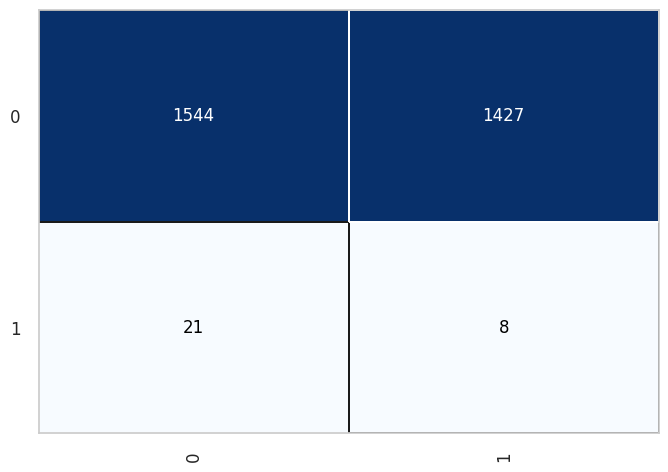

In [132]:
# confusion matrix
cm = ConfusionMatrix(log_reg, cmap='Blues')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)


In [128]:
logistic_normal = (classification_report(y_test, y_pred))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.99      0.52      0.68      2971
           1       0.01      0.28      0.01        29

    accuracy                           0.52      3000
   macro avg       0.50      0.40      0.35      3000
weighted avg       0.98      0.52      0.67      3000



In [129]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5173333333333333


**Insights & recommendations**

The model does not perform up-to-the-mark since it predicts 1427 instances as fraud where it was not a fraud and 21 instances as non-fraud where there was a fraud. It correctly predicts 1544 non-fraud instances as non-fraud -- however these are of no use to us since the main goal of the model is to correctly predict frauds as frauds. The F1-score of 1 (fraud) is just 0.01 -- which is terrible (F-1 score should be closer to 1 for fraudulent claims). To a layman, 51.7% may not seem to bad but it is misleading as the dataset is highly imbalanced (a lot more non-fraudulent cases relative to fraud). The model also fails to correctly identify most frauds with a recall of only 28% -- this is a serious issue since missing actual fraud cases are costly. Furthermore, the precision for fraud is also underwhelming at 1% (whenever the model predicts a cases as fraudulent, it is almost always wrong).

One reason for the underwhelming performance of the model is class imbalance even after making use of class-weight adjustments and regularization as the dataset has negligible fraud cases. We could make use of SMOTE to create more fraudulent cases -- however, according to generative AI, it will generate fraud data based on existing fraud cases so any new fraud patterns will not be introduced and the model will still struggle. Moreover, if the original dataset has noise and/or contains errors -- those will be amplified further leading worse model.

This model may have it's fair share of weaknesses but it's biggest strength is that it is simple and interpretable, and efficient as it is trained and tested quickly. Additionally, it also correctly predicts non-fraudulent claims (99% precision) -- however, again, this is of no use to us.

To improve fraud detection, we can make use of a tree-based model (for example, a random forest model as done in this youtube video: https://www.youtube.com/watch?v=oKgPU8CDON4) which could supposedly handle imbalanced data better. According to generative AI, isolation forest and autoencoders could be used as it flags anything that appears suspicious as the model learns what "normal cases" look like.

We can also use feature engineering to improve the model - one example is time-based features such as day of the week (from over the top of my head but many fraudulent claims could be made on the weekend as more people would have more time and for example a car accident is more likely to happen on a weekday since there is more traffic so the claim made on a weekend may seems suspicious). Checking a customer's claim history could also help to detect suspicions claims.
